# End of module project
PART 2 - Simple prediction model test

Objective is to try and have a simple odds prediction model

Uses the tennis matches results data between 2020 and 2022 from http://tennis-data.co.uk/alldata.php

In [1]:
# do the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# read data file
df = pd.read_csv('./2020-2022.csv')
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Doha,Qatar Exxon Mobil Open,1/6/2020,ATP250,Outdoor,Hard,1st Round,3,Bublik A.,...,0.0,Completed,2.00,1.72,2.21,1.74,2.25,1.80,2.11,1.72
1,1,Doha,Qatar Exxon Mobil Open,1/6/2020,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,...,0.0,Completed,1.57,2.25,1.60,2.47,1.65,2.47,1.59,2.34
2,1,Doha,Qatar Exxon Mobil Open,1/6/2020,ATP250,Outdoor,Hard,1st Round,3,Verdasco F.,...,0.0,Completed,1.25,3.75,1.31,3.74,1.33,3.85,1.29,3.53
3,1,Doha,Qatar Exxon Mobil Open,1/6/2020,ATP250,Outdoor,Hard,1st Round,3,Bedene A.,...,1.0,Completed,1.83,1.83,1.97,1.92,2.00,2.07,1.87,1.92
4,1,Doha,Qatar Exxon Mobil Open,1/6/2020,ATP250,Outdoor,Hard,1st Round,3,Chardy J.,...,1.0,Completed,1.50,2.50,1.54,2.62,1.57,2.65,1.53,2.47


In [3]:
# drop the lines where there are no data in AvgW, AvgL, WRank or LRank
numels = df.shape[0]
df = df.dropna(subset=['AvgW','AvgL','WRank','LRank'],axis=0)
print('Drop NA on AvgW, AvgL, WRank, LRank: ',numels-df.shape[0],' rows dropped')

# drop the lines where AvgW ou AvgL are dubious (more than 50% away from B365W / B365L)
numels = df.shape[0]
df = df.drop(df[df['AvgW']>1.5*df['B365W']].index,axis=0)
df = df.drop(df[df['AvgL']>1.5*df['B365L']].index,axis=0)
print('Drop dubious odds: ',numels-df.shape[0],' rows dropped')

df = df.reset_index(drop=True)

# compute delta rank (difference between winner and loser ranks)
df['DeltaRank'] = df['WRank']-df['LRank']

Drop NA on AvgW, AvgL, WRank, LRank:  15  rows dropped
Drop dubious odds:  10  rows dropped


Testing Linear Regression model based on rankings only (obviously too simple, but for the sake of trying)

In [4]:
# try and build model just based on rankings
subdf = df[['WRank','LRank','AvgW']]

# r2 only at 0.17 / 0.16 on train and test data
# select only matches where AvgW was <4 -> 0.22 / 0.24
# select only matches where AvgW was <3 -> 0.26 / 0.17
# select only matches where AvgW was <2 -> 0.18 / 0.21
#subdf = subdf[subdf['AvgW']<2]

X = subdf[['WRank','LRank']]
y = subdf['AvgW']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=2)

#Instantiate
#lm_model = LinearRegression(normalize=True) 
lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression()) # deprecation of Normalize=True
#lm_model = RandomForestRegressor(max_depth=5, random_state=0)


#Fit
lm_model.fit(X_train, y_train)

#Predict
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train) 

"The r-squared score for the model was {} on train set and {} on test set.".format(r2_score(y_train, y_train_preds), r2_score(y_test, y_test_preds))



'The r-squared score for the model was 0.16855913029838987 on train set and 0.15597613719945858 on test set.'

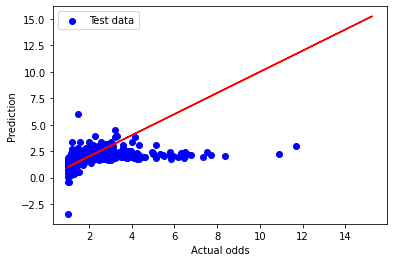

In [5]:
# show data
plt.scatter(y_test, y_test_preds, color = 'blue',label='Test data')
plt.plot(y_train, y_train, color = 'red')
plt.xlabel("Actual odds")
plt.ylabel("Prediction")
plt.legend()
plt.show()